<a href="https://colab.research.google.com/github/Sedinei/DSWP/blob/master/NB_trabalhado/Desafio_NumPy_NB02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Desafio para resolverem
> **Objetivo**: Simular aleatoriamente o salário de 1.000 pessoas com distribuição N(1.045; 100). 
* Identificar os _outliers_ da distribuição que acabamos de simular;
* Qual a média da distribuição que simulamos?
* Qual o desvio-padrão;
* Plotar o Boxplot da distribuição dos dados;
* Quantas pessoas > Q3 + 1.5*(Q3-Q1)
* Substituir os outliers do array por:
    * Q1-1.5*(Q3 - Q1), se ponto < Q1-1.5*(Q3-Q1)
    * Q3+1.5*(Q3 - Q1), se ponto > Q3+1.5*(Q3-Q1)

Obs.: Use np.random.seed(20111974).

In [7]:
import numpy as np
from numpy.random import default_rng
import seaborn as sns

In [9]:
np.set_printoptions(precision=2, suppress=True)

In [23]:
sns.set_style('dark')

In [10]:
rnd = default_rng(20111974)
salarios = rnd.normal(1045, 100, 1000)
salarios[:20]

array([ 981.05, 1226.73, 1075.56, 1006.47,  799.64,  976.85,  993.91,
       1180.95,  977.2 , 1023.48,  994.57, 1155.96, 1086.24, 1108.33,
       1085.9 , 1070.95, 1007.95,  865.29,  999.26, 1099.6 ])

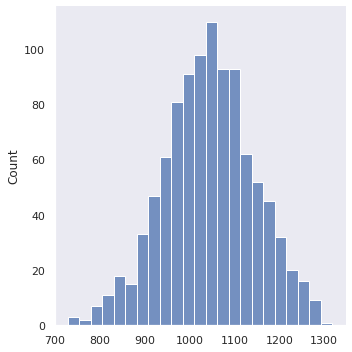

In [24]:
sns.displot(salarios)

In [28]:
print(f'Média = {np.mean(salarios)}')
print(f'Desvio padrão = {np.std(salarios)}')

Média = 1043.181399718921
Desvio padrão = 101.03177092747443


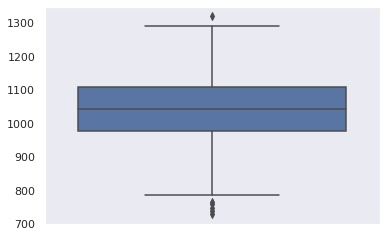

In [27]:
sns.boxplot(y=salarios)

In [21]:
q1, q3 = np.percentile(salarios, [25, 75])
print(f'Q1 = {q1}')
print(f'Q3 = {q3}')

Q1 = 975.428793712504
Q3 = 1108.1780254096598


In [22]:
iqr = q3 - q1
sal_min_out = q1 - 1.5 * iqr
sal_max_out = q3 + 1.5 * iqr
print(f'Limite inferior de salário para outlier: {sal_min_out}')
print(f'Limite superior de salário para outlier: {sal_max_out}')

Limite inferior de salário para outlier: 776.3049461667704
Limite superior de salário para outlier: 1307.3018729553935


In [29]:
outliers_superiores = salarios[salarios > sal_max_out]
outliers_inferiores = salarios[salarios < sal_min_out]
print(f'Quantidade de outliers superiores: {len(outliers_superiores)}')
print(f'Quantidade de outliers inferiores: {len(outliers_inferiores)}')

Quantidade de outliers superiores: 1
Quantidade de outliers inferiores: 5


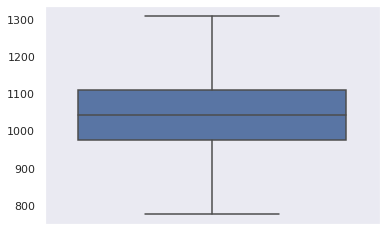

In [31]:
salarios_sem_out = salarios.copy()
salarios_sem_out[salarios_sem_out > sal_max_out] = sal_max_out
salarios_sem_out[salarios_sem_out < sal_min_out] = sal_min_out
sns.boxplot(y=salarios_sem_out)